### Web-scraping Trial

Turns out one can either web-scrape using libraries like Beautiful Soup, or use public APIs. The latter is apparently more stable. Either way, import basics first:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Let's start with APIs.

I want to access some historical financial data. Turns out most people use Yahoo Finance for that.

One can either use the Pandas library or a Yahoo library.

Using Pandas:

In [5]:
import pandas_datareader as pdr # this you have to install via conda/anaconda/pip or whatever

In [13]:
# request Bitcoin data from the yahoo public api (without specifying anything else):
btc_history = pdr.get_data_yahoo('BTC')

# display
print(btc_history.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 355 entries, 2020-10-01 to 2022-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       355 non-null    float64
 1   Low        355 non-null    float64
 2   Open       355 non-null    float64
 3   Close      355 non-null    float64
 4   Volume     355 non-null    int64  
 5   Adj Close  355 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.4 KB
None


In [17]:
# view the headers
print(btc_history.head())

                  High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2020-10-01  100.000000  100.000000  100.000000  100.000000       0  100.000000
2020-10-02  100.000000  100.000000  100.000000  100.000000       0  100.000000
2020-10-05  100.040001   99.995003  100.029999   99.995003   10725   99.995003
2020-10-06  100.029999  100.010002  100.010002  100.029999   10080  100.029999
2020-10-07   99.959999   99.919998   99.949997   99.919998    6350   99.919998


In [26]:
# look at the highs and lows, for example 
high_low = btc_history[['High', 'Low']]
print(high_low)

                  High         Low
Date                              
2020-10-01  100.000000  100.000000
2020-10-02  100.000000  100.000000
2020-10-05  100.040001   99.995003
2020-10-06  100.029999  100.010002
2020-10-07   99.959999   99.919998
...                ...         ...
2022-02-22   96.550003   96.523903
2022-02-23   96.390404   96.390404
2022-02-24   96.481598   96.481598
2022-02-25   96.495003   96.495003
2022-02-28   96.939102   96.939102

[355 rows x 2 columns]


Date
2020-10-01    100.000000
2020-10-02    100.000000
2020-10-05    100.040001
2020-10-06    100.029999
2020-10-07     99.959999
                 ...    
2022-02-22     96.550003
2022-02-23     96.390404
2022-02-24     96.481598
2022-02-25     96.495003
2022-02-28     96.939102
Name: High, Length: 355, dtype: float64 

Python object type: <class 'pandas.core.series.Series'> 



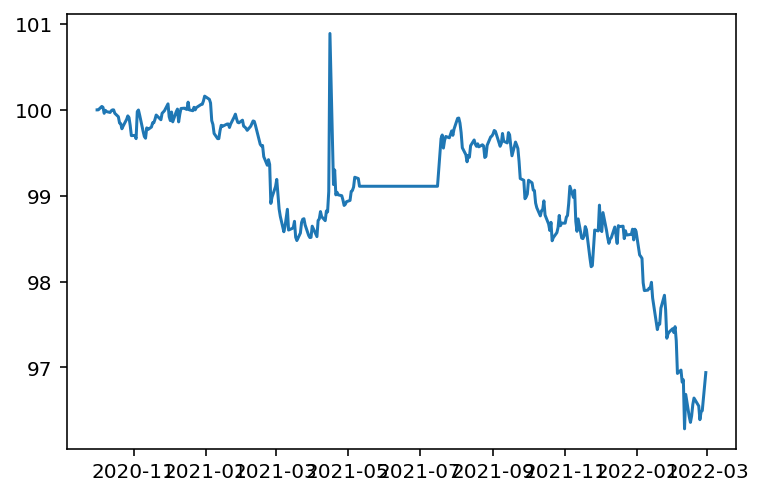

In [39]:
# Let's look at just the highs for example:
print(high_low['High'], '\n')

# which is some kind of array called 'series'
print('Python object type:', type(high_low['High']), '\n')

# which can be plotted in matplotlib
plt.plot(high_low['High'])
plt.show()

<AxesSubplot:xlabel='Date'>

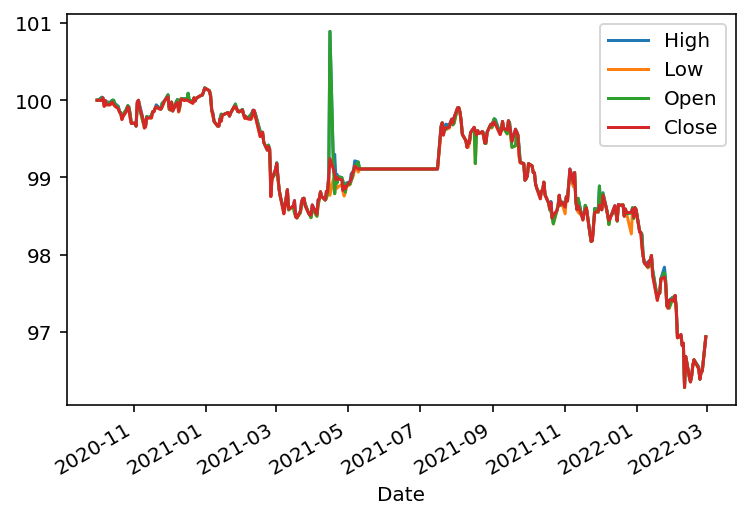

In [43]:
# Pandas actually has their own plot function (it calls matplotlib anyways but it's more user friendly)
# For example, plot the Highs, Lows, Opens, and Closes:
btc_history[['High', 'Low', 'Open', 'Close']].plot()

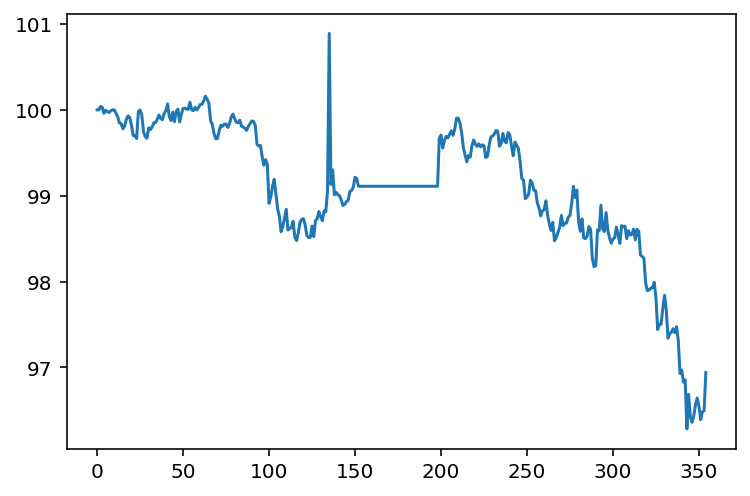

In [38]:
# but you can also make it into numpy array which disregards the dates:
high = np.array(high_low['High'])

plt.plot(high)
plt.show()

So that was an example of how to access data via some API using Pandas. I think there are other options, like with JSON for example.




#### Webscraping using Beautiful Soup

Web-scraping means you download the webpage as a HTML code.. so it's messier. To do it you need to:

1. Download the page using requests library
2. Navigate throough it with beautifulsoup4 library

Trying this for a weather forecast webstie:

In [45]:
import requests
from bs4 import BeautifulSoup

In [47]:
# download the page (this is all HTML code):
page = requests.get("https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")

# make the page into a beatiful soup object:
soup = BeautifulSoup(page.content, 'html.parser')

# want a 7day forecast (need to look up the id for other things):
seven_day = soup.find(id="seven-day-forecast")

# again, just a matter of finding the names of things
forecast_items = seven_day.find_all(class_="tombstone-container")

# forecast_items is something like a list with 7 entries, look at today
tonight = forecast_items[0]

# view it with a .prettify() command which is supposed to make it look more legible
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Overnight
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Overnight: Mostly cloudy, with a low around 50. West southwest wind around 7 mph. " class="forecast-icon" src="newimages/medium/nbkn.png" title="Overnight: Mostly cloudy, with a low around 50. West southwest wind around 7 mph. "/>
 </p>
 <p class="short-desc">
  Mostly Cloudy
 </p>
 <p class="temp temp-low">
  Low: 50 °F
 </p>
</div>
